In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn import preprocessing

os.getcwd()

C:\Users\jessi\Anaconda3\envs\mask_pyimagesearch\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jessi\Anaconda3\envs\mask_pyimagesearch\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jessi\Anaconda3\envs\mask_pyimagesearch\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jessi\Anaconda3\envs\mask

'C:\\Users\\jessi\\Mask_RCNN\\samples\\pineappleResNet50_aug'

In [2]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.pineappleResNet50 import pineapple

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [3]:
config = pineapple.PineappleConfig()
PINEAPPLE_DIR = os.path.join(ROOT_DIR, "datasets/fruitsize_AB")

In [4]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [5]:
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [6]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [7]:
# Load validation dataset
dataset = pineapple.PineappleDataset()
dataset.load_pineapple(PINEAPPLE_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 27
Classes: ['BG', 'pineapple']


In [8]:
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [9]:
# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
#USED THIS ONE 
weights_path = "C:\\Users\\jessi\\Mask_RCNN\\logs\\pineapple20201116T0825\\mask_rcnn_pineapple_0027.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Users\jessi\Mask_RCNN\logs\pineapple20201116T0825\mask_rcnn_pineapple_0027.h5
Re-starting from epoch 27


image ID: pineapple.vlcsnap-2020-09-17-14h33m11s690Crop.jpg (14) C:\Users\jessi\Mask_RCNN\datasets/fruitsize_AB\val\vlcsnap-2020-09-17-14h33m11s690Crop.jpg
gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  307.00000  max:  907.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  bool


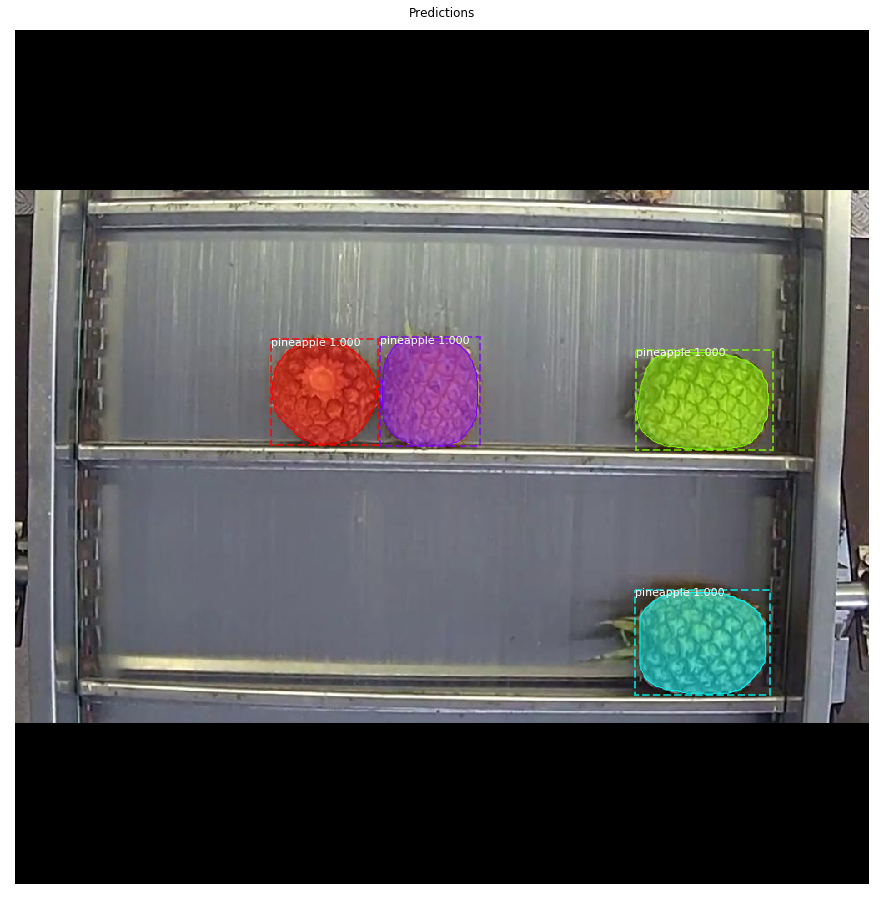

In [10]:
image_id = dataset.image_ids[14]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=0)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [11]:
# PREDICTED MASKS
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

detections               shape: (1, 100, 6)           min:    0.00000  max:    1.00000  float32
masks                    shape: (1, 100, 28, 28, 2)   min:    0.00000  max:    1.00000  float32
4 detections: ['pineapple' 'pineapple' 'pineapple' 'pineapple']


In [12]:
# Masks
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

det_mask_specific        shape: (4, 28, 28)           min:    0.00000  max:    1.00000  float32
det_masks                shape: (4, 1024, 1024)       min:    0.00000  max:    1.00000  bool


In [13]:
det_masks.shape # each detected mask has a size of 1024 x 1024 px

(4, 1024, 1024)

In [14]:
det_masks[0].sum() # number of 1's in binary mask can be found using .sum()

15782

In [15]:
len(det_masks) # the number of objects detected in the image is given by the length of det_masks

4

In [16]:
for pred_mask in det_masks:
    print(pred_mask.sum())

15782
12725
16008
12337


In [17]:
gt_mask.shape

(1024, 1024, 4)

In [18]:
gtruth_masks = np.transpose(gt_mask, [2, 0, 1])
gtruth_masks.shape

(4, 1024, 1024)

In [19]:
for mask in gtruth_masks:
    print(mask.sum())

13207
13463
16654
16766


In [20]:
image_ids = dataset.image_ids
pred_projArea = []
gtruth_projArea = []


for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    
    # Run object detection
    results = model.detect([image], verbose=0)
    # save predicted mask output
    pred_masks = results[0]['masks']
    pred_masks = np.transpose(pred_masks, [2, 0, 1])
    
    # Extract ground truth mask areas by summing pixels in each GROUND TRUTH binary mask
    gtruth_masks = np.transpose(gt_mask, [2, 0, 1]) # need to reshape first
    for mask in gtruth_masks:
        gtruth_projArea.append(mask.sum())
 
    # Extract predicted mask areas by summing pixels in each DETECTED binary mask
    for pred_mask in pred_masks:
        pred_projArea.append(pred_mask.sum())
        
    print(pred_masks.shape, gtruth_masks.shape)


(7, 1024, 1024) (7, 1024, 1024)
(7, 1024, 1024) (7, 1024, 1024)
(3, 1024, 1024) (3, 1024, 1024)
(5, 1024, 1024) (5, 1024, 1024)
(3, 1024, 1024) (3, 1024, 1024)
(4, 1024, 1024) (4, 1024, 1024)
(5, 1024, 1024) (5, 1024, 1024)
(6, 1024, 1024) (6, 1024, 1024)
(4, 1024, 1024) (4, 1024, 1024)
(3, 1024, 1024) (3, 1024, 1024)
(7, 1024, 1024) (7, 1024, 1024)
(5, 1024, 1024) (5, 1024, 1024)
(1, 1024, 1024) (1, 1024, 1024)
(6, 1024, 1024) (6, 1024, 1024)
(4, 1024, 1024) (4, 1024, 1024)
(2, 1024, 1024) (2, 1024, 1024)
(1, 1024, 1024) (1, 1024, 1024)
(2, 1024, 1024) (2, 1024, 1024)
(4, 1024, 1024) (4, 1024, 1024)
(3, 1024, 1024) (3, 1024, 1024)
(6, 1024, 1024) (6, 1024, 1024)
(2, 1024, 1024) (2, 1024, 1024)
(6, 1024, 1024) (6, 1024, 1024)
(7, 1024, 1024) (7, 1024, 1024)
(2, 1024, 1024) (2, 1024, 1024)
(9, 1024, 1024) (9, 1024, 1024)
(6, 1024, 1024) (6, 1024, 1024)


In [21]:
len(pred_projArea)

120

In [22]:
len(gtruth_projArea)

120

In [23]:
# get predicted/ detected areas into a dataframe with labels
pred_df = pd.DataFrame(pred_projArea, columns=["Projected area"])
pred_df.insert(1, "type", "predicted")
pred_df

,Projected area,type
0,22830,predicted
1,21255,predicted
2,26707,predicted
3,19155,predicted
4,18711,predicted
...,...,...
115,14658,predicted
116,9288,predicted
117,11880,predicted
118,11263,predicted


In [24]:
# get ground truth areas into a dataframe with labels
gtruth_df = pd.DataFrame(gtruth_projArea, columns=["Projected area"])
gtruth_df.insert(1, "type", "ground truth")
gtruth_df

,Projected area,type
0,21014,ground truth
1,16164,ground truth
2,14407,ground truth
3,24017,ground truth
4,22866,ground truth
...,...,...
115,11830,ground truth
116,15272,ground truth
117,9632,ground truth
118,15308,ground truth


In [25]:
# the masks have the same size. So we don't need to scale to be able to compare them
# so just concatenate directly

projAreas = pd.concat([gtruth_df, pred_df])
projAreas

,Projected area,type
0,21014,ground truth
1,16164,ground truth
2,14407,ground truth
3,24017,ground truth
4,22866,ground truth
...,...,...
115,14658,predicted
116,9288,predicted
117,11880,predicted
118,11263,predicted


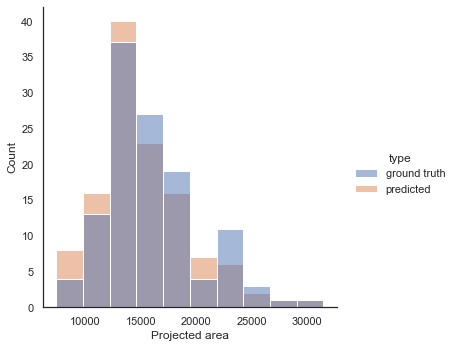

In [26]:
# plot as overlapping histograms
sns.set_theme()
sns.set_style("white")
sns.displot(projAreas, x="Projected area", hue="type", bins=10)

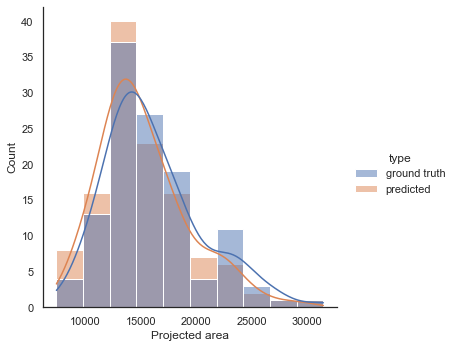

In [27]:
# plot as overlapping histograms
sns.set_theme()
sns.set_style("white")
sns.displot(projAreas, x="Projected area", hue="type", bins=10, kde=True)

In [28]:
# Z-test for projected area (UNSCALED)

ztest ,pval = stests.ztest(gtruth_df["Projected area"], x2=pred_df["Projected area"], value=0,alternative='two-sided')
print(ztest, float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.4915653863870744 0.13581311795799764
accept null hypothesis


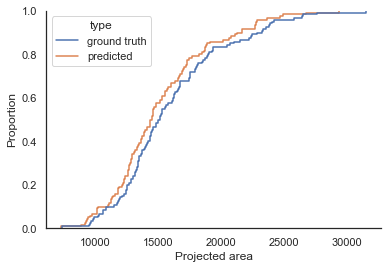

In [29]:
# plot ECDF
sns.set_theme()
sns.set_style("white")
sns.ecdfplot(data=projAreas, x="Projected area", hue="type")
sns.despine(top=True, right=True)

In [30]:
# computing KS statistic for projected areas
stats.ks_2samp(gtruth_df["Projected area"], pred_df["Projected area"])

Ks_2sampResult(statistic=0.11666666666666667, pvalue=0.3889566002413223)

In [31]:
# scale the ground truth mask area measurements
gt_area_scaled = pd.DataFrame(preprocessing.scale(gtruth_projArea), columns=["Projected area"])
gt_area_scaled.insert(1, "type", "ground truth")
gt_area_scaled


,Projected area,type
0,1.134688,ground truth
1,0.024969,ground truth
2,-0.377047,ground truth
3,1.821798,ground truth
4,1.558440,ground truth
...,...,...
115,-0.966685,ground truth
116,-0.179128,ground truth
117,-1.469605,ground truth
118,-0.170891,ground truth


In [32]:
# scale the ground truth mask area measurements
pred_area_scaled = pd.DataFrame(preprocessing.scale(pred_projArea), columns=["Projected area"])
pred_area_scaled.insert(1, "type", "predicted")
pred_area_scaled


,Projected area,type
0,1.870910,predicted
1,1.482703,predicted
2,2.826514,predicted
3,0.965094,predicted
4,0.855657,predicted
...,...,...
115,-0.143328,predicted
116,-1.466928,predicted
117,-0.828051,predicted
118,-0.980129,predicted


In [38]:
# concatenate SCALED dfs
sc_projAreas = pd.concat([gt_area_scaled, pred_area_scaled], ignore_index=True)
sc_projAreas

,Projected area,type
0,1.134688,ground truth
1,0.024969,ground truth
2,-0.377047,ground truth
3,1.821798,ground truth
4,1.558440,ground truth
...,...,...
235,-0.143328,predicted
236,-1.466928,predicted
237,-0.828051,predicted
238,-0.980129,predicted


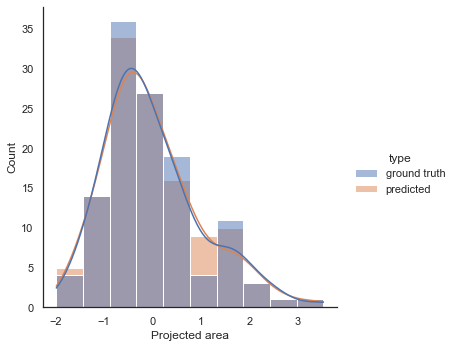

In [34]:
# plot as overlapping histograms
sns.set_theme()
sns.set_style("white")
sns.displot(sc_projAreas, x="Projected area", hue="type", bins=10, kde=True)

In [35]:
# Z-test for projected area (SCALED)

ztest ,pval = stests.ztest(gt_area_scaled["Projected area"], x2=pred_area_scaled["Projected area"], value=0,alternative='two-sided')
print(ztest, float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.283691550018916e-16 0.9999999999999998
accept null hypothesis


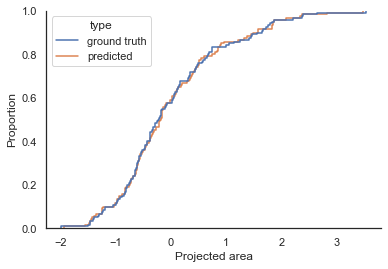

In [36]:
# plot ECDF
sns.set_theme()
sns.set_style("white")
sns.ecdfplot(data=sc_projAreas, x="Projected area", hue="type")
sns.despine(top=True, right=True)

In [37]:
# computing KS statistic for SCALED projected areas
stats.ks_2samp(gt_area_scaled["Projected area"], pred_area_scaled["Projected area"])

Ks_2sampResult(statistic=0.041666666666666664, pvalue=0.9999542705402878)